In [16]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [17]:
# Step 2: Load dataset (already cleaned and structured)
df = pd.read_csv('data_BreastCancer.csv')

# Step 3: Map 'diagnosis' to binary target
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 4: Select two numeric features for visualization
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['target'].values


In [18]:
# Step 5: Train/Test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Step 6: Function to visualize decision boundaries and margins
def plot_svm_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100, facecolors='none', edgecolors='k', label='Support Vectors'
    )
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.legend()
    plt.show()


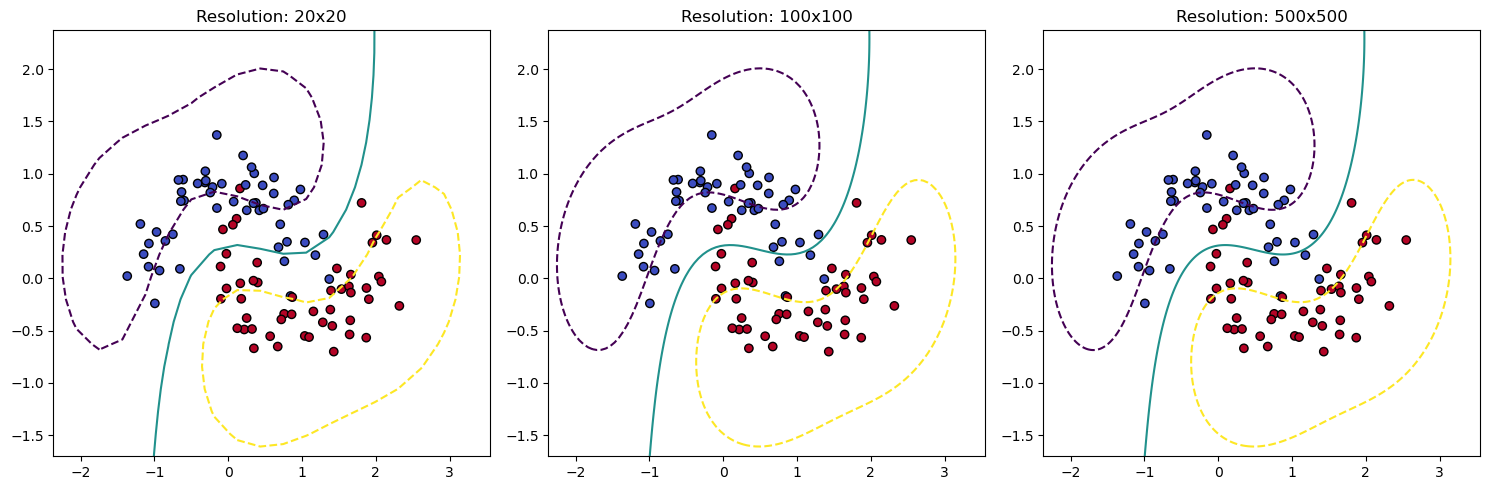

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons

# Generate some non-linear toy data
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Train an SVM with non-linear kernel
model = svm.SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(resolution, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'Resolution: {resolution}x{resolution}')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot with different resolutions
for ax, res in zip(axs, [20, 100, 500]):
    plot_decision_boundary(res, ax)

plt.tight_layout()
plt.show()


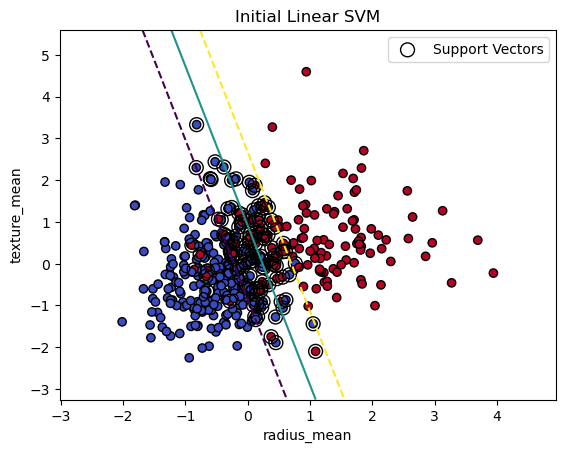

Support Vectors per Class: [58 57]
Support Vector Indices: [  4   9  16  17  37  38  60  61  72  86  94 104 126 131 132 137 145 176
 177 178 187 196 200 202 203 212 228 234 239 254 255 258 261 264 279 294
 301 304 307 310 319 328 332 333 336 348 355 362 368 369 370 373 381 383
 384 385 395 396   1  18  21  30  35  62  65  75  81  83  87  89 108 117
 123 127 128 135 142 146 163 165 166 167 172 179 192 199 201 211 216 217
 238 240 242 245 248 250 253 267 273 276 285 295 296 299 302 322 327 340
 349 350 354 358 366 367 380]


In [20]:
# Step 7: Train initial linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# Step 8: Plot decision boundary
plot_svm_decision_boundary(svm_linear, X_train, y_train, "Initial Linear SVM")

# Step 9: Support Vector Info
print("Support Vectors per Class:", svm_linear.n_support_)
print("Support Vector Indices:", svm_linear.support_)


In [21]:
# Step 10: Cross-validation
cv_scores = cross_val_score(svm_linear, X_train, y_train, cv=5)
print("5-Fold CV Scores:", np.round(cv_scores, 3))
print("Mean CV Accuracy:", round(cv_scores.mean(), 3))


5-Fold CV Scores: [0.912 0.962 0.85  0.848 0.835]
Mean CV Accuracy: 0.882


In [28]:
# Step 11: Hyperparameter tuning (GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 3))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.887


In [23]:
# Step 12: Evaluate best model on test set
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

#hinge loss for SVM


Test Accuracy: 0.918

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      1.00      0.94       107
   Malignant       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



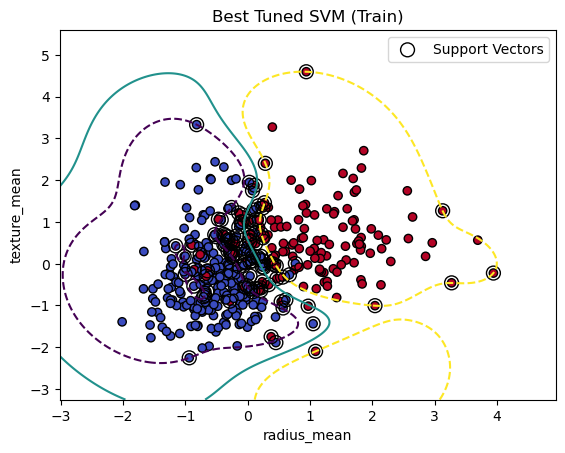

In [24]:
# Step 13: Plot final decision boundary
plot_svm_decision_boundary(best_svm, X_train, y_train, "Best Tuned SVM (Train)")


In [25]:
def predict_cancer_status(model, scaler, radius_mean, texture_mean):
    """
    Predicts breast cancer status for new input data using trained SVM model.
    
    Args:
        model: Trained SVM model (e.g., best_svm or svm_linear)
        scaler: Fitted StandardScaler used during training
        radius_mean: float, value for 'radius_mean' feature
        texture_mean: float, value for 'texture_mean' feature

    Returns:
        None (prints whether the tumor is Malignant or Benign)
    """
    # 1. Construct input
    input_data = np.array([[radius_mean, texture_mean]])

    # 2. Apply the same scaling
    input_scaled = scaler.transform(input_data)

    # 3. Predict
    prediction = model.predict(input_scaled)[0]

    # 4. Output
    result = "Malignant" if prediction == 1 else "Benign"
    print(f"Predicted Cancer Status: {result}")


In [30]:
# Example: Input from new patient
predict_cancer_status(
    model=best_svm,
    scaler=scaler,
    radius_mean=17.99,
    texture_mean=10.38
)


Predicted Cancer Status: Malignant
